## LINEAR REGRESSION ANALYSIS
THIS SCRIPT CONTAINES THE FOLLOWING:
    1. IMPORTING LIBRARIES AND DATA
    2. DATA CLEANING
    3. DATA PRP FOR REGRESSION ANALYSIS
    4. REGRESSION ANALYSIS: PERFORMANCE IMPROVEMENT AFTER REMOVING OUTLINERS

## 1. IMPORTING LIBRARIES AND DATA

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Ensuring that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# creating path to import the files
path = r'C:\Users\rbrand\New York Citi Bikes'

In [4]:
# Importing cb_clean_data3.csv data set from prepared data.
cb_clean_data3 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cb_clean_data3.csv'), index_col=False)

In [5]:
#Double checking the shape of the clean data
cb_clean_data3.columns

Index(['Unnamed: 0', 'trip_id', 'bike_id', 'weekday', 'start_hour',
       'start_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_time',
       'end_station_id', 'end_station_name', 'end_station_latitude',
       'end_station_longitude', 'trip_duration', 'subscriber', 'birth_year',
       'gender', 'trip_duration_minutes'],
      dtype='object')

In [6]:
cb_clean_data3.head(20)

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes
0,0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,16.550000
1,1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,9.683333
2,2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,6.016667
3,3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,9.350000
4,4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,1,38.266667
5,5,HbKJBz,14581,Fri,22,9/27/2013 22:01,293,Lafayette St & E 8 St,40.730287,-73.990765,9/27/2013 22:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,7.116667
6,6,aOKk3s,15022,Sun,13,9/29/2013 13:13,380,W 4 St & 7 Ave S,40.734011,-74.002939,9/29/2013 13:23,317,E 6 St & Avenue B,40.724537,-73.981854,639,Subscriber,1994.0,1,10.650000
7,7,kpcluW,16253,Sat,10,9/21/2013 10:48,346,Bank St & Hudson St,40.736529,-74.006180,9/21/2013 10:52,212,W 16 St & The High Line,40.743349,-74.006818,263,Subscriber,1969.0,1,4.383333
8,8,GC8mJC,16745,Fri,12,9/20/2013 12:29,510,W 51 St & 6 Ave,40.760660,-73.980420,9/20/2013 12:40,422,W 59 St & 10 Ave,40.770513,-73.988038,666,Subscriber,1993.0,1,11.100000
9,9,qyXq7X,19556,Tue,16,9/3/2013 16:56,446,W 24 St & 7 Ave,40.744876,-73.995299,9/3/2013 17:05,342,Columbia St & Rivington St,40.717400,-73.980166,582,Subscriber,1983.0,1,9.700000


## 2. DATA CLEANING

C:\Users\rbrand\AppData\Local\Temp\ipykernel_25068\4071308843.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cb_clean_data3['trip_duration'], bins=25)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


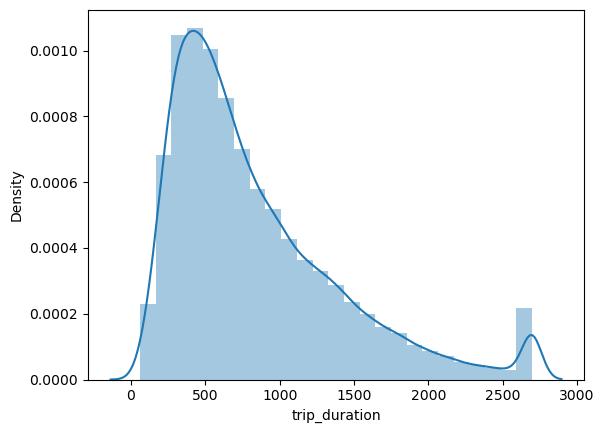

In [7]:
#Showing extreme values for further anlysis
sns.distplot(cb_clean_data3['trip_duration'], bins=25)
# Saving the graph to our records
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'trip_duration_distribution.png'))
plt.show()

In [8]:
cb_clean_data3 ['trip_duration'].mean() #checking the mean

838.9829

In [9]:
cb_clean_data3 ['trip_duration'].median() #checking the mean

672.0

In [10]:
cb_clean_data3 ['trip_duration'].max() #checking the mean

2697

## 3. DATA PREPARATION FOR REGRESSION ANALYSIS

In [13]:
#new library installed to calculate distances between start and end stations.
from geopy.distance import geodesic

# Function to calculate distance between start and end stations
def calculate_distance(row):
    start_coords = (row['start_station_latitude'], row['start_station_longitude'])
    end_coords = (row['end_station_latitude'], row['end_station_longitude'])
    distance = geodesic(start_coords, end_coords).meters
    return distance

In [14]:
# Apply the function to each row to calculate distances
cb_clean_data3['distance'] = cb_clean_data3.apply(calculate_distance, axis=1)

In [15]:
# Display the dataset with the newly added 'distance' column
print(cb_clean_data3[['trip_id', 'distance']])

      trip_id     distance
0      LnQzQk  1451.105634
1      IL9boN  1637.904949
2      46clGB   922.070726
3      v7vdFt  1543.233294
4      VGBsb5  1469.427475
...       ...          ...
49995  Fb2bmC   640.764397
49996  XGB7JU  3217.315607
49997  vFs2HS  1743.352651
49998  xxacSt  2234.711737
49999  4ZmicF   410.819951

[50000 rows x 2 columns]


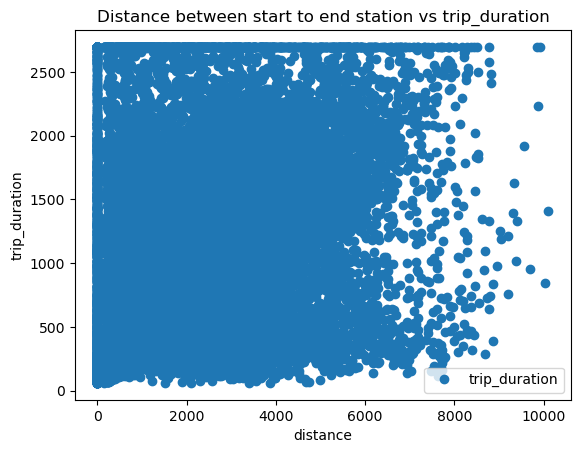

In [16]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
cb_clean_data3.plot(x = 'distance', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance between start to end station vs trip_duration')  
plt.xlabel('distance')  
plt.ylabel('trip_duration')  
plt.show()

In [17]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = cb_clean_data3['distance'].values.reshape(-1,1)
Y = cb_clean_data3['trip_duration'].values.reshape(-1,1)

In [19]:
X

array([[1451.10563372],
       [1637.90494852],
       [ 922.07072631],
       ...,
       [1743.3526505 ],
       [2234.7117374 ],
       [ 410.81995136]])

In [21]:
Y

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]], dtype=int64)

In [23]:
# Spliting the data into a training set and a test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## 4. REGRESSION ANALYSS

In [25]:
#Creating a regression object which will be fit onto the training set.

regression = LinearRegression()

In [27]:
# Fitting the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [28]:
# Predicting the values of y using X.

Y_predicted = regression.predict(X_test)

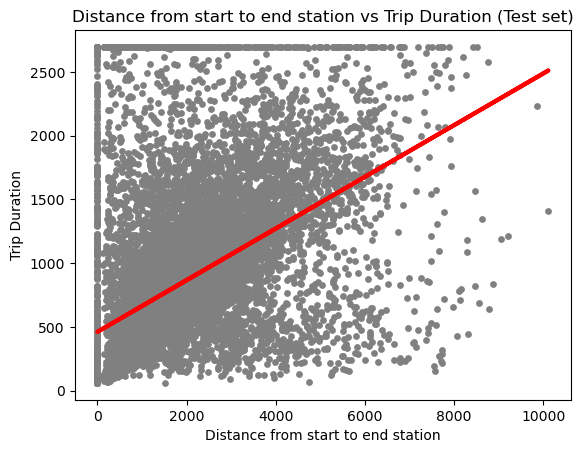

In [29]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('Distance from start to end station vs Trip Duration (Test set)')
plot_test.xlabel('Distance from start to end station')
plot_test.ylabel('Trip Duration')
plot_test.show()

In [30]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(Y_test, Y_predicted) # This is the mean squared error
r2 = r2_score(Y_test, Y_predicted) # This is the R2 score.

In [31]:
# Printing the model summary statistics. This is where we can evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20294]]
Mean squared error:  254600.81610888863
R2 score:  0.23554286073663866


In [32]:
Y_predicted

array([[ 633.26709503],
       [1053.3691972 ],
       [1103.86110379],
       ...,
       [ 566.97342586],
       [ 958.68733133],
       [1452.93277318]])

In [33]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,360,633.267095
1,1626,1053.369197
2,1137,1103.861104
3,758,644.316351
4,306,606.632497
5,670,802.902079
6,330,600.993049
7,1105,605.659788
8,213,584.464530
9,259,594.306521


## COMPARING HOW THE REGRESSION FITS THE TRAINING SET

In [34]:
# Predicting.
Y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(Y_train, Y_predicted_train)
r2 = r2_score(Y_train, Y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20294]]
Mean squared error:  249221.76229256717
R2 score:  0.23874837578522468


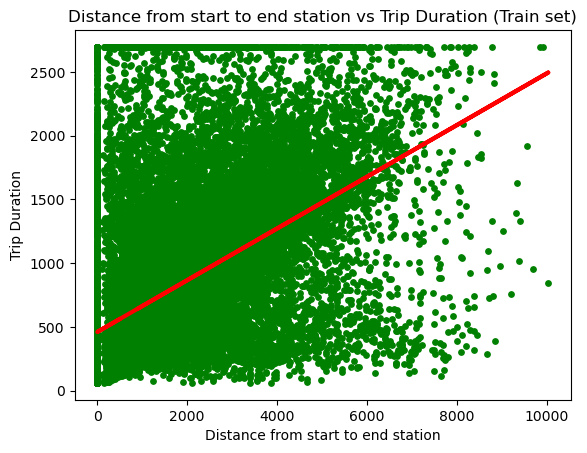

<Figure size 640x480 with 0 Axes>

In [37]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, Y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from start to end station vs Trip Duration (Train set)')
plot_test.xlabel('Distance from start to end station')
plot_test.ylabel('Trip Duration')
plot_test.show()

# Saving the graph to our records
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'plot_test_scatter.png'))
plt.show()

## BONUS:PERFORMANCE IMPROVEMENT AFTER REMOVING OUTLIERS

In [39]:
# Cleanning the extreme values from the "Trip Duration" variable observed during the consistency checks.

cb_clean_data3_test = cb_clean_data3[cb_clean_data3['trip_duration'] <=100] 

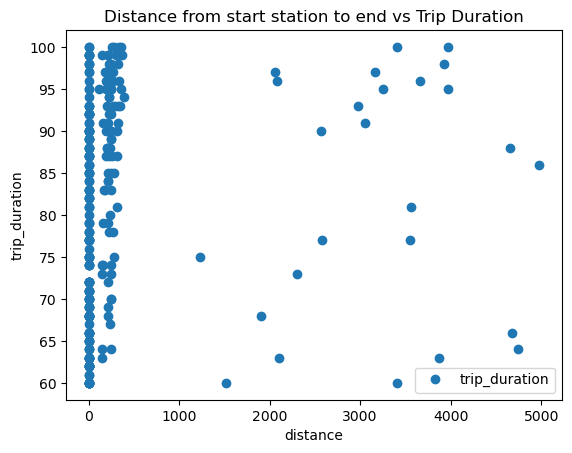

In [43]:
# checking how the scatterplot looks without outliers.

cb_clean_data3_test.plot(x = 'distance', y='trip_duration', style='o')  
plt.title('Distance from start station to end vs Trip Duration')  
plt.xlabel('distance')  
plt.ylabel('trip_duration')  
plt.show()

In [44]:
# Reshaping again.

X_2 = cb_clean_data3['distance'].values.reshape(-1,1)
y_2 = cb_clean_data3['trip_duration'].values.reshape(-1,1)

In [45]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [46]:
# Running and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predicting.

y_predicted_2 = regression.predict(X_test_2)

In [49]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20294]]
Mean squared error:  254600.81610888863
R2 score:  0.23554286073663866


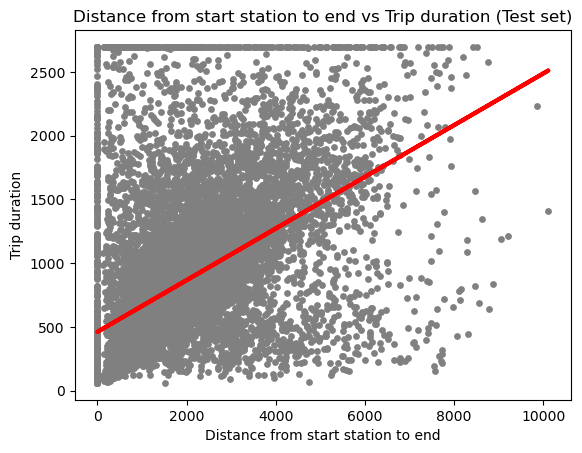

<Figure size 640x480 with 0 Axes>

In [52]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from start station to end vs Trip duration (Test set)')
plot_test.xlabel('Distance from start station to end')
plot_test.ylabel('Trip duration')
plot_test.show()
# Saving the graph to our records
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'plot_test_scatter1.png'))
plt.show()

In [53]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,360,633.267095
1,1626,1053.369197
2,1137,1103.861104
3,758,644.316351
4,306,606.632497
5,670,802.902079
6,330,600.993049
7,1105,605.659788
8,213,584.464530
9,259,594.306521


## Interpretation:
The linear regression models aimed to predict how trip durations relate to distances between start and end stations for Citibike in NYC.

## Original Model Insights:
The original model indicates that about 23.6% of the variance in trip durations can be explained by the distances between start and end stations. The slope suggests that trip durations tend to increase as the distance between start and end stations increases. However, the model's performance is moderate, suggesting that other factors beyond distance might influence trip durations.

## Post-Regression Model Insights:
After the regression analysis, there was a slight improvement in the model's performance. The updated model explains a bit more variance in trip durations (approximately 23.9%) compared to the original model. While the improvement is small, it suggests that the model is slightly better at capturing the relationship between trip durations and distances.

## Reflections on Data Bias:
Considering potential biases in the data collection process is important. Factors like sampling bias or measurement errors could impact the model's accuracy. It's essential to ensure that the data used for analysis is representative and free from biases. Addressing biases and improving data quality can lead to more reliable model predictions and better insights into the relationship between trip durations and distances.


In [54]:
#Exporting cb_clean_data4 with the new distance calculations between start and end stations. 
cb_clean_data3.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'cb_clean_data4.csv'))